# Project: Wrangling and Analyze Data

In [1]:
## About project

In [2]:
#importing packages
import pandas as pd
import numpy as np
import requests
import json
from PIL import Image
from io import BytesIO


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# download the archive data 

df_archive = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv")

In [4]:
# saving df to csv file
df_archive.to_csv("twitter-archive-enhanced.csv", index=False)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#Use request library download tsv 

r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

# write to file 

with open("image-predictions.tsv", "wb") as file:
    file.write(r.content)


In [6]:
#read tsv into dataframe

df_image = pd.read_csv("image-predictions.tsv", sep="\t")


3. Get twitter json file


In [7]:
r = requests.get("https://video.udacity-data.com/topher/2018/November/5bf60cc8_tweet-json/tweet-json")

# write to file 

with open("tweet_json.txt", "wb") as file:
    file.write(r.content)

In [8]:
#read tweet_json into list of dictionaries
tweet_list =[]

with open("tweet_json.txt", "r") as tweet_json:
    for l in tweet_json:
        t= json.loads(l)
        tweet_id = t['id']
        rt_count = t['retweet_count']
        fav_count = t['favorite_count']
        followers_count = t['user']['followers_count']

        tweet_list.append({
            "tweet_id": tweet_id,
            "retweet_count": rt_count,
            "favorite_count": fav_count,
            "followers_count": followers_count
        })

In [9]:
# convert tweet_list of dictionaries to dataframe

df_tweet = pd.DataFrame(tweet_list, columns =tweet_list[0].keys())

## Assessing Data



### Visual Assessments

In [10]:
# Visually Assessing the archived data (df_archive)

df_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [11]:
#Visually acessing image dataset (df_image)
df_image

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [12]:
# Visually acesssing tweet dataset(df_tweet)

df_tweet

tweet_id  retweet_count  favorite_count  followers_count
0     892420643555336193           8853           39467          3200889
1     892177421306343426           6514           33819          3200889
2     891815181378084864           4328           25461          3200889
3     891689557279858688           8964           42908          3200889
4     891327558926688256           9774           41048          3200889
...                  ...            ...             ...              ...
2349  666049248165822465             41             111          3201018
2350  666044226329800704            147             311          3201018
2351  666033412701032449             47             128          3201018
2352  666029285002620928             48             132          3201018
2353  666020888022790149            532            2535          3201018

[2354 rows x 4 columns]

### Pragmatic Assessment


### Archived Tweet Data

In [13]:
# Using code to assess archive data

#check info
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
#check for duplicates
sum(df_archive.duplicated())

0

In [15]:
# check unique values of names  that are not names


unique_names = df_archive.name.unique() 

for i in unique_names:
    if len(i) < 3:
        print(i)

a
Mo
Bo
an
O
Al
my
by
Ed
JD
Jo


In [16]:
df_archive[df_archive["name"]== 'O']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
775  776201521193218049                    NaN                  NaN   

                     timestamp  \
775  2016-09-14 23:30:38 +0000   

                                                source  \
775  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
775  This is O'Malley. That is how he sleeps. Doesn...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
775                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
775  https://twitter.com/dog_rates/status/776201521...                10   

     rating_denominator name doggo floofer pupper puppo  
775                  10    O  None    None   None  None

In [17]:
df_archive[df_archive["name"]== 'my']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
852  765395769549590528                    NaN                  NaN   

                     timestamp  \
852  2016-08-16 03:52:26 +0000   

                                                source  \
852  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
852  This is my dog. Her name is Zoey. She knows I'...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
852                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
852  https://twitter.com/dog_rates/status/765395769...                13   

     rating_denominator name doggo floofer pupper puppo  
852                  10   my  None    None   None  None

In [18]:
df_archive[df_archive["name"]== 'by']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1724  680085611152338944                    NaN                  NaN   

                      timestamp  \
1724  2015-12-24 18:00:19 +0000   

                                                 source  \
1724  <a href="https://about.twitter.com/products/tw...   

                                                   text  retweeted_status_id  \
1724  This is by far the most coordinated series of ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1724                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1724  https://twitter.com/dog_rates/status/680085611...                12   

      rating_denominator name doggo floofer pupper puppo  
1724                  10   by  None    None   None  None

In [19]:
df_archive[df_archive["name"]== 'an']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
759   778396591732486144                    NaN                  NaN   
1025  746369468511756288                    NaN                  NaN   
1362  703041949650034688                    NaN                  NaN   
2204  668636665813057536                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2349  666051853826850816                    NaN                  NaN   

                      timestamp  \
759   2016-09-21 00:53:04 +0000   
1025  2016-06-24 15:48:42 +0000   
1362  2016-02-26 02:20:37 +0000   
2204  2015-11-23 03:46:18 +0000   
2333  2015-11-16 19:31:45 +0000   
2335  2015-11-16 16:11:11 +0000   
2349  2015-11-16 00:35:11 +0000   

                                                 source  \
759   <a href="http://twitter.com/download/iphone" r...   
1025  <a href="http://twitter.com/download/iphone" r...   
1362  <a href="http://twitter.com/download/iphone" r...   
2204  <a href="http://twitter.com/download/iphone" r...   
2333  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   
2349  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
759   RT @dog_rates: This is an East African Chalupa...         7.030419e+17   
1025  This is an Iraqi Speed Kangaroo. It is not a d...                  NaN   
1362  This is an East African Chalupa Seal. We only ...                  NaN   
2204  This is an Irish Rigatoni terrier named Berta....                  NaN   
2333  This is an extremely rare horned Parthenon. No...                  NaN   
2335  This is an Albanian 3 1/2 legged  Episcopalian...                  NaN   
2349  This is an odd dog. Hard on the outside but lo...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
759               4.196984e+09  2016-02-26 02:20:37 +0000   
1025                       NaN                        NaN   
1362                       NaN                        NaN   
2204                       NaN                        NaN   
2333                       NaN                        NaN   
2335                       NaN                        NaN   
2349                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
759   https://twitter.com/dog_rates/status/703041949...                10   
1025  https://twitter.com/dog_rates/status/746369468...                 9   
1362  https://twitter.com/dog_rates/status/703041949...                10   
2204  https://twitter.com/dog_rates/status/668636665...                10   
2333  https://twitter.com/dog_rates/status/666337882...                 9   
2335  https://twitter.com/dog_rates/status/666287406...                 1   
2349  https://twitter.com/dog_rates/status/666051853...                 2   

      rating_denominator name doggo floofer pupper puppo  
759                   10   an  None    None   None  None  
1025                  10   an  None    None   None  None  
1362                  10   an  None    None   None  None  
2204                  10   an  None    None   None  None  
2333                  10   an  None    None   None  None  
2335                   2   an  None    None   None  None  
2349                  10   an  None    None   None  None

In [20]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [21]:
# lower case indicates name are not real names
bad_names = df_archive[df_archive['name'].str.islower()]['name'].to_list()

bad_names = list(set(bad_names))
bad_names

['not',
 'this',
 'infuriating',
 'one',
 'mad',
 'life',
 'his',
 'such',
 'just',
 'officially',
 'getting',
 'quite',
 'old',
 'unacceptable',
 'incredibly',
 'space',
 'all',
 'actually',
 'an',
 'very',
 'the',
 'a',
 'my',
 'light',
 'by']

> There are lot of cleaning to do for the name column, the column were not properly extracted and thus led to non-existent names or a partially extracted name.

In [22]:
#The first record on the  table above shows a retweet which is a like a duplicate

#find all retweets
df_archive[df_archive.text.str.contains('RT')  & df_archive.text.str.contains('@')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
...                  ...                    ...                  ...   
1023  746521445350707200                    NaN                  NaN   
1043  743835915802583040                    NaN                  NaN   
1242  711998809858043904                    NaN                  NaN   
2259  667550904950915073                    NaN                  NaN   
2260  667550882905632768                    NaN                  NaN   

                      timestamp  \
19    2017-07-21 01:02:36 +0000   
32    2017-07-15 02:45:48 +0000   
36    2017-07-13 01:35:06 +0000   
68    2017-06-26 00:13:58 +0000   
73    2017-06-24 00:09:53 +0000   
...                         ...   
1023  2016-06-25 01:52:36 +0000   
1043  2016-06-17 16:01:16 +0000   
1242  2016-03-21 19:31:59 +0000   
2259  2015-11-20 03:51:52 +0000   
2260  2015-11-20 03:51:47 +0000   

                                                 source  \
19    <a href="http://twitter.com/download/iphone" r...   
32    <a href="http://twitter.com/download/iphone" r...   
36    <a href="http://twitter.com/download/iphone" r...   
68    <a href="http://twitter.com/download/iphone" r...   
73    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1023  <a href="http://twitter.com/download/iphone" r...   
1043  <a href="http://twitter.com/download/iphone" r...   
1242  <a href="http://twitter.com/download/iphone" r...   
2259  <a href="http://twitter.com" rel="nofollow">Tw...   
2260  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                   text  retweeted_status_id  \
19    RT @dog_rates: This is Canela. She attempted s...         8.874740e+17   
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...         8.860537e+17   
36    RT @dog_rates: This is Lilly. She just paralle...         8.305833e+17   
68    RT @dog_rates: This is Emmy. She was adopted t...         8.780576e+17   
73    RT @dog_rates: Meet Shadow. In an attempt to r...         8.782815e+17   
...                                                 ...                  ...   
1023  RT @dog_rates: This is Shaggy. He knows exactl...         6.678667e+17   
1043  RT @dog_rates: Extremely intelligent dog here....         6.671383e+17   
1242  RT @twitter: @dog_rates Awesome Tweet! 12/10. ...         7.119983e+17   
2259  RT @dogratingrating: Exceptional talent. Origi...         6.675487e+17   
2260  RT @dogratingrating: Unoriginal idea. Blatant ...         6.675484e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
19                4.196984e+09  2017-07-19 00:47:34 +0000   
32                1.960740e+07  2017-07-15 02:44:07 +0000   
36                4.196984e+09  2017-02-12 01:04:29 +0000   
68                4.196984e+09  2017-06-23 01:10:23 +0000   
73                4.196984e+09  2017-06-23 16:00:04 +0000   
...                        ...                        ...   
1023              4.196984e+09  2015-11-21 00:46:50 +0000   
1043              4.196984e+09  2015-11-19 00:32:12 +0000   
1242              7.832140e+05  2016-03-21 19:29:52 +0000   
2259              4.296832e+09  2015-11-20 03:43:06 +0000   
2260              4.296832e+09  2015-11-20 03:41:59 +0000   

                                          expanded_urls  rating_numerator  \
19    https://twitter.com/dog_rates/status/887473957...                13   
32    https://twitter.com/dog_rates/status/886053434...                12   
36    https://twitter.com/dog_rates/status/830583320...                13   
68    https://twitt

> There are 181 retweeted posts

In [23]:
#function to check unique values in a data frame and avaid repition of code

def check_unique(df, cols):
    for col in cols:
        print(col)
        print(df[col].unique())
        print("\n")

In [24]:
chk_un_col = ['doggo', 'floofer', 'pupper','puppo', 'rating_denominator']
check_unique(df_archive, chk_un_col)

doggo
['None' 'doggo']


floofer
['None' 'floofer']


pupper
['None' 'pupper']


puppo
['None' 'puppo']


rating_denominator
[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]




In [25]:
#function to check for duplicates in columns dataframe

def check_duplicate(df, cols):
    for col in cols:
        print(col)
        print(sum(df[col].duplicated()))
        print("\n")


In [26]:
columns = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'expanded_urls']

check_duplicate(df_archive, columns)

tweet_id
0


in_reply_to_status_id
2278


in_reply_to_user_id
2324


retweeted_status_id
2174


retweeted_status_user_id
2330


expanded_urls
137




> Summary of archived data pragmatic assessment
1. in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp all have the wrong data types
2. The name column has wrong names eg 'a', 'an', 'my' ...
3. rating_denominator should be 10, but there are some > 10
4. source column can not be easily read i.e it is not tidy


### Image Data

In [27]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
#check for duplicates
sum(df_image.duplicated())

0

In [29]:
# check unique values of columns
columns = ['img_num','p1_dog', 'p2_dog', 'p3_dog']
check_unique(df_image, columns)

img_num
[1 4 2 3]


p1_dog
[ True False]


p2_dog
[ True False]


p3_dog
[ True False]




In [30]:
#Check duplicates
columns = ['tweet_id', 'jpg_url']

check_duplicate(df_image, columns)

tweet_id
0


jpg_url
66




In [31]:
df_image.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

> Summary of image data assessment(visual and pragmatic)
1. There are no row duplicates
2. All columns are the right data type
3. The image url has 66 duplicates
4. There are no missing values
5. Inconsitency in case of dog names

### Tweet Data

In [32]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [33]:
sum(df_tweet.duplicated())

0

In [34]:
df_tweet.describe()

tweet_id  retweet_count  favorite_count  followers_count
count  2.354000e+03    2354.000000     2354.000000     2.354000e+03
mean   7.426978e+17    3164.797366     8080.968564     3.200942e+06
std    6.852812e+16    5284.770364    11814.771334     4.457302e+01
min    6.660209e+17       0.000000        0.000000     3.200799e+06
25%    6.783975e+17     624.500000     1415.000000     3.200898e+06
50%    7.194596e+17    1473.500000     3603.500000     3.200945e+06
75%    7.993058e+17    3652.000000    10122.250000     3.200953e+06
max    8.924206e+17   79515.000000   132810.000000     3.201018e+06

> Summary of Tweet data 
1. There are no duplicate data
2. There are no missing data
3. All columns are the right data type

### Quality issues

#### Tweet archive data
1. `source` not clear enough ✅
2. Invalid names like 'a', 'an', 'my', 'by', 'quite', 'the' etc ✅
3. Incomplete name 'O' instead of 'O'malley'✅
4. Missing names and values should be NaN instead of None ✅
5. Columns relating to retweet are irrelevant - retweeted_status_id	retweeted_status_user_id retweeted_status_timestamp	 in_reply_to_status_id and in_reply_to_user_id✅
6. Timestamp should be date time not object ✅
7. Rating denominator should be 10 not greater ✅
8. Some of the record were not dog ratings ✅

#### Image Data 
9. Inconsitency with letter case of p1, p2 and p3 ✅
 


### Tidiness issues

#### Tweet Archive data
1. Dog stages should be one column rather than 4 ✅
2. We require only original tweet not retweets ✅

## Cleaning Data

In [35]:
# Make copies of original pieces of data
archive= df_archive.copy()
image = df_image.copy()
tweet = df_tweet.copy()


## Quality Issues

### Issue #1: Source column not clear 

#### Define: Extract Twitter source from the href attribute

#### Code

In [36]:
# extract source

archive['source'] = archive['source'].apply(lambda x: x.split('>')[1][:-3])

#### Test

In [37]:
archive.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #2: Missing Values should be NaN not none

#### Define:Replace all missing values in archive with np.nan

#### Code

In [38]:
# replace none as NaN
archive.replace({'None': np.nan}, inplace=True)


#### Test

In [39]:
archive[archive.isin(['None']) == False]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp              source  \
0     2017-08-01 16:23:56 +0000  Twitter for iPhone   
1     2017-08-01 00:17:27 +0000  Twitter for iPhone   
2     2017-07-31 00:18:03 +0000  Twitter for iPhone   
3     2017-07-30 15:58:51 +0000  Twitter for iPhone   
4     2017-07-29 16:00:24 +0000  Twitter for iPhone   
...                         ...                 ...   
2351  2015-11-16 00:24:50 +0000  Twitter for iPhone   
2352  2015-11-16 00:04:52 +0000  Twitter for iPhone   
2353  2015-11-15 23:21:54 +0000  Twitter for iPhone   
2354  2015-11-15 23:05:30 +0000  Twitter for iPhone   
2355  2015-11-15 22:32:08 +0000  Twitter for iPhone   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/

### Issue #3: Rating denominator greater than 10

#### Define: Replace all denominator variables greater than 10 with 10

In [40]:
# replace all denominator greater than 10

outlier  = list(archive.rating_denominator.unique())

archive['rating_denominator'].replace(outlier, 10, inplace=True)


#### Test

In [41]:
archive.rating_denominator.unique()

array([10], dtype=int64)

### Issue #4: Timestamp should be date time not object

#### Define: Change Timestamp datatype to datetime object


In [42]:
#convert to datetime
archive['timestamp'] = pd.to_datetime(archive['timestamp'], format="%Y-%m-%dT%H:%M:%S")

#### Test:

In [43]:
# archive 
archive.timestamp.dtype

datetime64[ns, UTC]

In [44]:
archive['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

### Issue #5: Columns relating to retweet are irrelevant - retweeted_status_id	retweeted_status_user_id retweeted_status_timestamp	 in_reply_to_status_id and in_reply_to_user_id

#### Define: Drop retweeted_status_id	retweeted_status_user_id retweeted_status_timestamp	 in_reply_to_status_id and in_reply_to_user_id because the analysis is focused on orginal tweets

In [45]:
archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [46]:
archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #6: Incomplete name 'O' instead of 'O'malley'

#### Define: Properly extract O'malley name

In [47]:
#get text that contains name 
new_name = archive[archive['name']=='O']['text'].str.split(' ').str[2].to_list()


#replace name
archive.name.replace({'O': new_name[-1][:-1]}, inplace=True)

#### Test

In [48]:
archive[archive['name']=='O']

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [49]:
archive[archive['name']=="O'Malley"]

tweet_id                 timestamp              source  \
775  776201521193218049 2016-09-14 23:30:38+00:00  Twitter for iPhone   

                                                  text  \
775  This is O'Malley. That is how he sleeps. Doesn...   

                                         expanded_urls  rating_numerator  \
775  https://twitter.com/dog_rates/status/776201521...                10   

     rating_denominator      name doggo floofer pupper puppo  
775                  10  O'Malley   NaN     NaN    NaN   NaN

###  Issue #7 : Invalid names like 'a', 'an', 'my', 'by'

#### Define: Some names were not properly extracted from text, properly extract names from the text

In [50]:
# Check inavlid names
names = bad_names
names

['not',
 'this',
 'infuriating',
 'one',
 'mad',
 'life',
 'his',
 'such',
 'just',
 'officially',
 'getting',
 'quite',
 'old',
 'unacceptable',
 'incredibly',
 'space',
 'all',
 'actually',
 'an',
 'very',
 'the',
 'a',
 'my',
 'light',
 'by']

In [51]:
archive.head()

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas   NaN     NaN    NaN   NaN  
1                  10     Tilly   NaN     NaN    NaN   NaN  
2                  10    Archie   NaN     NaN    NaN   NaN  
3                  10     Darla   NaN     NaN    NaN   NaN  
4                  10  Franklin   NaN     NaN    NaN   NaN

In [52]:
# I observed some of the names in the text column were after 'named'

# extract the names after 'named'
m = archive['text'].str.contains('named')
archive.loc[m, 'name'] = archive['text'].str.split('named').str[1].str.split('.').str[0]

In [53]:
archive[archive['name'].isin(names)].head()

#observed that text that said 'We only rate dogs' dont have a name so they should be replaced with NaN

tweet_id                 timestamp              source  \
22   887517139158093824 2017-07-19 03:39:09+00:00  Twitter for iPhone   
56   881536004380872706 2017-07-02 15:32:16+00:00  Twitter for iPhone   
118  869988702071779329 2017-05-31 18:47:24+00:00  Twitter for iPhone   
169  859196978902773760 2017-05-02 00:04:57+00:00  Twitter for iPhone   
193  855459453768019968 2017-04-21 16:33:22+00:00  Twitter for iPhone   

                                                  text  \
22   I've yet to rate a Venezuelan Hover Wiener. Th...   
56   Here is a pupper approaching maximum borkdrive...   
118  RT @dog_rates: We only rate dogs. This is quit...   
169  We only rate dogs. This is quite clearly a smo...   
193  Guys, we only rate dogs. This is quite clearly...   

                                         expanded_urls  rating_numerator  \
22   https://twitter.com/dog_rates/status/887517139...                14   
56   https://twitter.com/dog_rates/status/881536004...                14   
118  https://twitter.com/dog_rates/status/859196978...                12   
169  https://twitter.com/dog_rates/status/859196978...                12   
193  https://twitter.com/dog_rates/status/855459453...                12   

     rating_denominator   name doggo floofer  pupper puppo  
22                   10   such   NaN     NaN     NaN   NaN  
56                   10      a   NaN     NaN  pupper   NaN  
118                  10  quite   NaN     NaN     NaN   NaN  
169                  10  quite   NaN     NaN     NaN   NaN  
193                  10  quite   NaN     NaN     NaN   NaN

In [54]:
# replace all occurrences where animals/items are not dogs
n = archive['text'].str.contains('We only rate dogs')


archive.loc[n, 'name'] = np.nan

In [55]:
#properly extract name from texts that contains name is
o = archive['text'].str.contains('name is')
archive.loc[o, 'name'] = archive['text'].str.split('name is').str[1].str.split(' ').str[1].str.split('.').str[0]



#archive[archive['text'].str.contains('name is')]['text'].str.split('name is').str[1].str.split(' ').str[1].str.split('.').str[0]


In [56]:
#replace all othe anomalies with np.nan

o = archive['name'].isin(names)


archive.loc[o, 'name'] = np.nan

#### Test

In [57]:
archive[archive['name'].isin(names)]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #8: Inconsitency with letter case of p1, p2 and p3

#### Define: Change all cases to Title case and remove underscores

In [58]:
#change cases of all image data set

image['p1'] = image['p1'].str.title().str.replace('_',' ')
image['p2'] = image['p2'].str.title().str.replace('_',' ')
image['p3'] = image['p3'].str.title().str.replace('_',' ')


#### Test

In [59]:

image.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh Springer Spaniel  0.465074    True              Collie   
1        1                 Redbone  0.506826    True  Miniature Pinscher   
2        1         German Shepherd  0.596461    True            Malinois   
3        1     Rhodesian Ridgeback  0.408143    True             Redbone   
4        1      Miniature Pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland Sheepdog  0.061428    True  
1  0.074192    True  Rhodesian Ridgeback  0.072010    True  
2  0.138584    True           Bloodhound  0.116197    True  
3  0.360687    True   Miniature Pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### Issue #9: Some of the record were not dog ratings

#### Define: Drop rows that contained 'We rate dogs only'

In [60]:
#check rows that contained we rate dogs only
archive = archive[~(archive['text'].str.lower().str.contains('we rate dogs') | archive['text'].str.lower().str.contains('we only rate dogs'))]


#### Test: 

In [61]:
archive[archive['text'].str.lower().str.contains('we rate dogs') | archive['text'].str.lower().str.contains('we only rate dogs')]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

## Tidiness Issues

### Issue #10: Dog stages should be one column rather than 4

#### Define: merge 4 stages into 1

In [62]:
#use pandas melt function to combine 4 columns into a single column
archive = archive.melt(id_vars=("tweet_id","timestamp","source","text",	"expanded_urls","rating_numerator",	"rating_denominator","name"), value_vars=("doggo","floofer","pupper","puppo"), value_name='dog_stage')

In [63]:
# drop variable column

archive = archive.drop('variable', axis=1)

#### Test:

In [64]:
#check unique values in dog stage
archive.dog_stage.unique()


array([nan, 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [65]:
#check column names
archive.head()

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  
0                  10   Phineas       NaN  
1                  10     Tilly       NaN  
2                  10    Archie       NaN  
3                  10     Darla       NaN  
4                  10  Franklin       NaN

### Issue #11: We require only original tweet not retweets

#### Define: Drop retweets

In [66]:
# retweets records contains RT and @
archive = archive[~(archive.text.str.contains('RT')  & archive.text.str.contains('@'))]

#### Test:

In [67]:
archive[archive.text.str.contains('RT')  & archive.text.str.contains('@')]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [68]:
#merge all 3 cleaned data frame: archive, image, tweet based on id
twitter_archive_master =  archive.merge(image,on='tweet_id').merge(tweet,on='tweet_id')

In [69]:
#twitter_archive_master.head()

In [70]:
#check for duplicates

sum(twitter_archive_master.duplicated())

5497

In [71]:
#drop duplicates

twitter_archive_master.drop_duplicates(inplace=True)

In [72]:
#check for duplicates

sum(twitter_archive_master.duplicated())

0

In [73]:
sum(twitter_archive_master.tweet_id.duplicated())

317

In [74]:

twitter_archive_master = twitter_archive_master.sort_values('dog_stage').drop_duplicates('tweet_id',keep= 'first')

In [75]:
sum(twitter_archive_master.tweet_id.duplicated())

0

In [76]:
#reset index
twitter_archive_master.reset_index(drop=True)

tweet_id                 timestamp              source  \
0     890240255349198849 2017-07-26 15:59:51+00:00  Twitter for iPhone   
1     775733305207554048 2016-09-13 16:30:07+00:00  Twitter for iPhone   
2     782305867769217024 2016-10-01 19:47:08+00:00  Twitter for iPhone   
3     782747134529531904 2016-10-03 01:00:34+00:00  Twitter for iPhone   
4     785639753186217984 2016-10-11 00:34:48+00:00  Twitter for iPhone   
...                  ...                       ...                 ...   
1933  666049248165822465 2015-11-16 00:24:50+00:00  Twitter for iPhone   
1934  666044226329800704 2015-11-16 00:04:52+00:00  Twitter for iPhone   
1935  666033412701032449 2015-11-15 23:21:54+00:00  Twitter for iPhone   
1936  666029285002620928 2015-11-15 23:05:30+00:00  Twitter for iPhone   
1937  666020888022790149 2015-11-15 22:32:08+00:00  Twitter for iPhone   

                                                   text  \
0     This is Cassie. She is a college pup. Studying...   
1     This is Anakin. He strives to reach his full d...   
2     This is Sampson. He just graduated. Ready to b...   
3     This is Deacon. He's the happiest almost dry d...   
4     This is Pinot. He's a sophisticated doggo. You...   
...                                                 ...   
1933  Here we have a 1949 1st generation vulpix. Enj...   
1934  This is a purebred Piers Morgan. Loves to Netf...   
1935  Here is a very happy pup. Big fan of well-main...   
1936  This is a western brown Mitsubishi terrier. Up...   
1937  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/890240255...                14   
1     https://twitter.com/dog_rates/status/775733305...                11   
2     https://twitter.com/dog_rates/status/782305867...                12   
3     https://twitter.com/dog_rates/status/782747134...                11   
4     https://twitter.com/dog_rates/status/785639753...                10   
...                                                 ...               ...   
1933  https://twitter.com/dog_rates/status/666049248...                 5   
1934  https://twitter.com/dog_rates/status/666044226...                 6   
1935  https://twitter.com/dog_rates/status/666033412...                 9   
1936  https://twitter.com/dog_rates/status/666029285...                 7   
1937  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator     name dog_stage  \
0                     10   Cassie     doggo   
1                     10   Anakin     doggo   
2                     10  Sampson     doggo   
3                     10   Deacon     doggo   
4                     10    Pinot     doggo   
...                  ...      ...       ...   
1933                  10      NaN       NaN   
1934                  10      NaN       NaN   
1935                  10      NaN       NaN   
1936                  10      NaN       NaN   
1937                  10      NaN       NaN   

                                              jpg_url  ...  p1_dog  \
0     https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg  ...    True   
1     https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg  ...   False   
2     https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg  ...    True   
3     https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg  ...    True   
4     https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg  ...   False   
...                                               ...  ...     ...   
1933  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg  ...    True   
1934  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg  ...    True   
1935  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg  ...    True   
1936  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg  ...    True   
1937  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg  ...    True   

                               p2   p2_conf  p2_dog                   p3  \
0          

In [77]:
#save as csv file
twitter_archive_master.to_csv("twitter-archive-master.csv", index=False)

## Analyzing and Visualizing Data


In [78]:
master = twitter_archive_master.copy()

In [79]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 36 to 7748
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1938 non-null   int64              
 1   timestamp           1938 non-null   datetime64[ns, UTC]
 2   source              1938 non-null   object             
 3   text                1938 non-null   object             
 4   expanded_urls       1938 non-null   object             
 5   rating_numerator    1938 non-null   int64              
 6   rating_denominator  1938 non-null   int64              
 7   name                1378 non-null   object             
 8   dog_stage           306 non-null    object             
 9   jpg_url             1938 non-null   object             
 10  img_num             1938 non-null   int64              
 11  p1                  1938 non-null   object             
 12  p1_conf             1938 non-null

### What Source brings in the most tweet ?

In [80]:
#most used twitter source
master.source.value_counts()

Twitter for iPhone    1900
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

Twitter for iPhone generates the most tweets

### Description and the dog Image of the most retweeted post

In [81]:
# Post with the highest retweets
# get max retweets
max_rt = master['retweet_count'].max()

url = master[master['retweet_count'] == max_rt]['jpg_url'].iloc[0]
text = master[master['retweet_count'] == max_rt]['text'].iloc[0]

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
79515


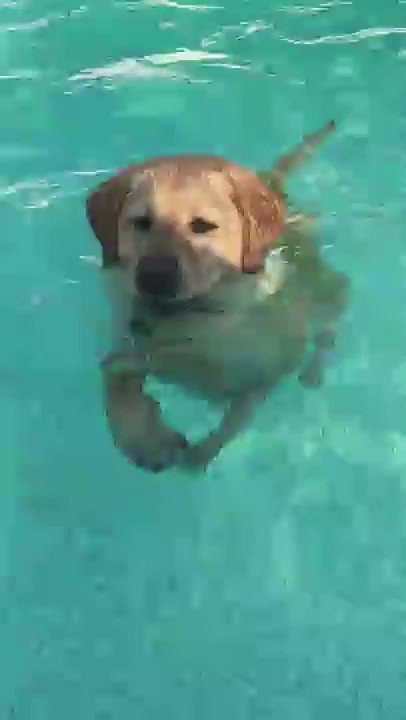

In [82]:
print(text)
print(max_rt)
r = requests.get(url)
Image.open(BytesIO(r.content))


### Description and the dog Image of the highest favorite count

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
132810


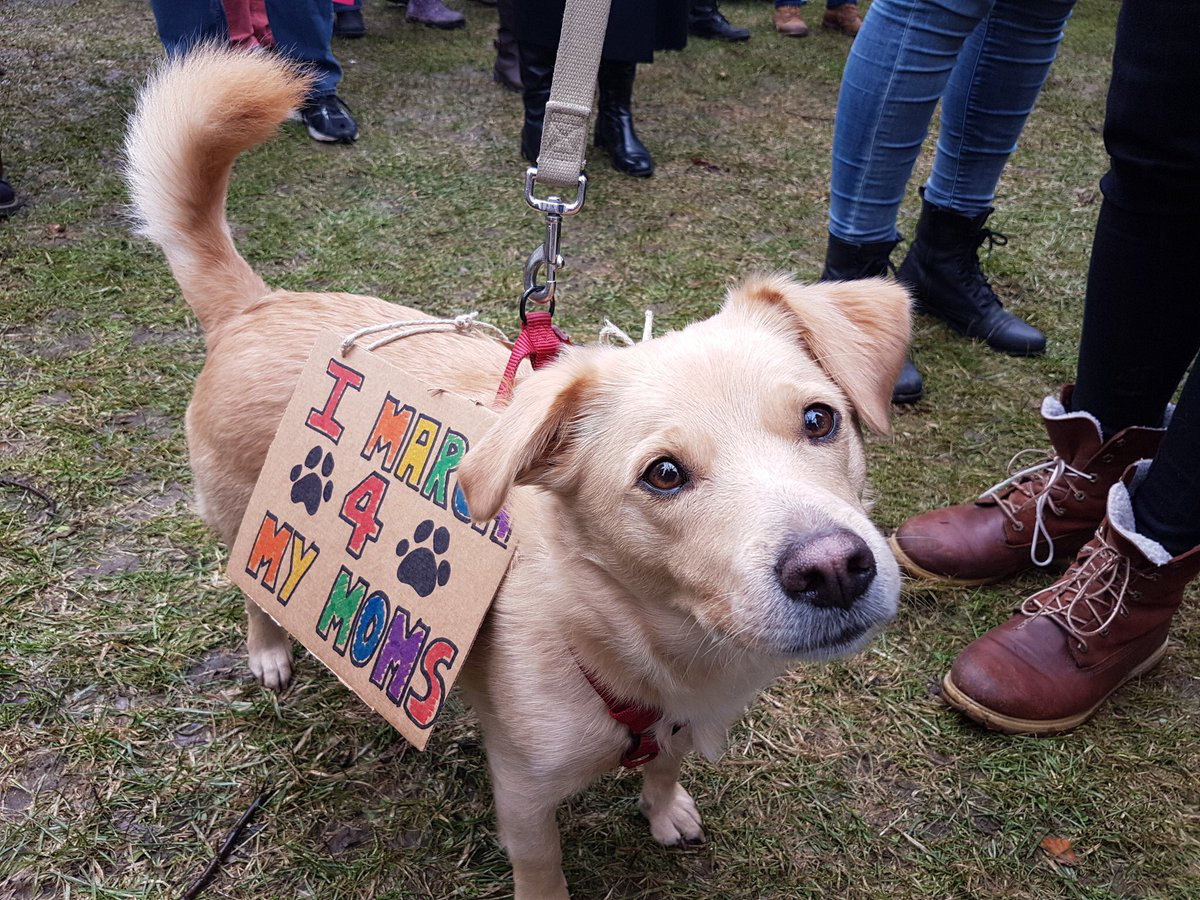

In [83]:
# most favorite post

max_fav = master['favorite_count'].max()


url = master[master['favorite_count'] == max_fav]['jpg_url'].iloc[0]
text = master[master['favorite_count'] == max_fav]['text'].iloc[0]

print(text)
print(max_fav)
r = requests.get(url)
Image.open(BytesIO(r.content))


### Whats the most common dog stage

In [84]:
master.dog_stage.value_counts()

pupper     203
doggo       74
puppo       22
floofer      7
Name: dog_stage, dtype: int64

### Dog with the highest rating

In [85]:
max_rating = master['rating_numerator'].max()
max_rating

1776

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Dog rating: 1776


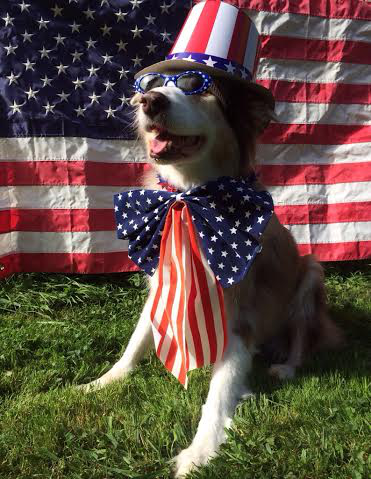

In [86]:

url = master[master['rating_numerator'] == max_rating]['jpg_url'].iloc[0]
text = master[master['rating_numerator'] == max_rating]['text'].iloc[0]

print(text)
print(('Dog rating: {}').format(max_rating))
r = requests.get(url)
Image.open(BytesIO(r.content))


### Most popular dog name

In [87]:
master.name.value_counts().nlargest(5)

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Tucker      9
Name: name, dtype: int64

### Dog with the lowest rating

In [88]:
url1 = master[master['rating_numerator'] == master['rating_numerator'].min()]['jpg_url'].iloc[0]

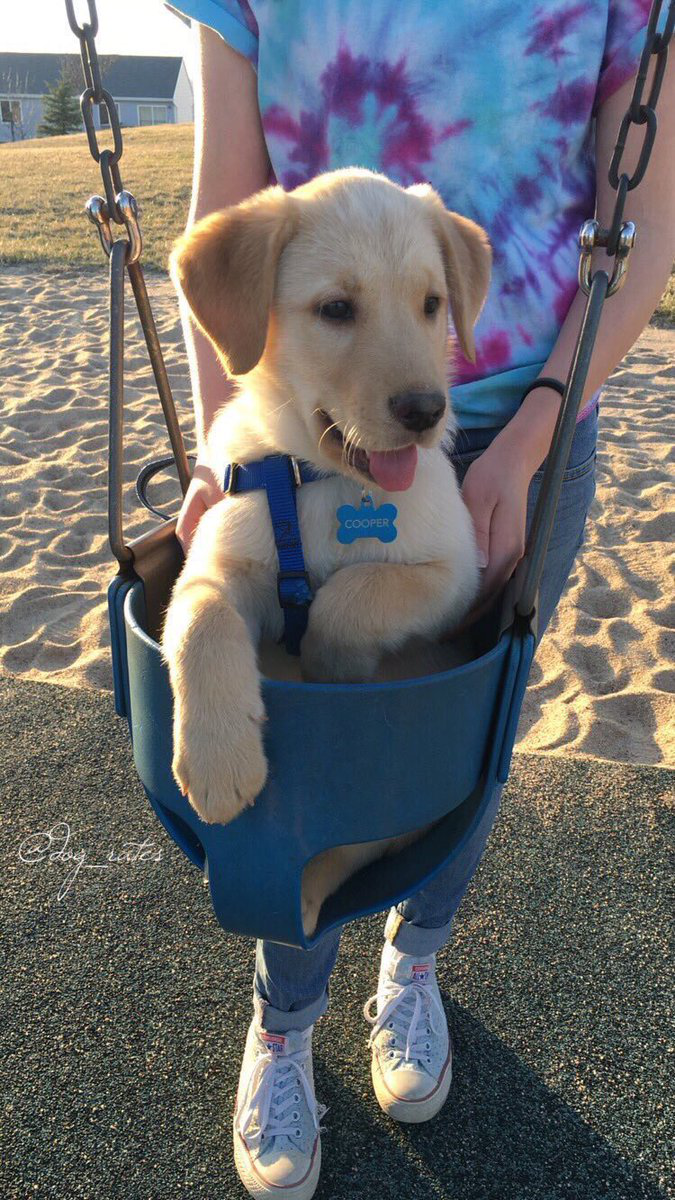

In [89]:
r = requests.get(url1)
Image.open(BytesIO(r.content))


### Visualization

In [90]:
#cretae a column for the breed with highest confidence
condition = [master['img_num']== 1,
                master['img_num']==2,
                master['img_num']==3]


choices = [master['p1'], master['p2'], master['p3']]

master['breed'] = np.select(condition, choices)

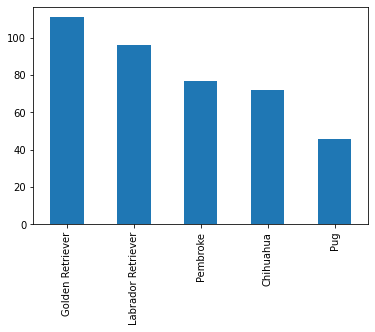

In [91]:
#top dog breeds

master.breed.value_counts().nlargest().plot(kind='bar');

### Followers count Over the years

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
master.groupby(pd.Grouper(key='timestamp', freq='A'))['followers_count'].mean().astype(int)

timestamp
2015-12-31 00:00:00+00:00    3200998
2016-12-31 00:00:00+00:00    3200931
2017-12-31 00:00:00+00:00    3200891
Freq: A-DEC, Name: followers_count, dtype: int32

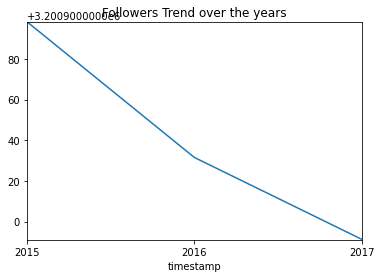

In [94]:
master.groupby(pd.Grouper(key='timestamp', freq='A'))['followers_count'].mean().plot()
plt.title('Followers Trend over the years')
plt.ylim(3200891, 3200998);

### Insights:
1. Over the years, the folllowers count for weratedogs has reduced.
2. Golden retriever is the most common dog breed
3. Charlie is the most common dog name
4. Puppo is the most common dog stage